# 1a.) GMM from scratch

#### GMM with EM on 1D data

In [17]:
import matplotlib.pyplot as plt
from sklearn import cluster, datasets, mixture
import numpy as np
from scipy.stats import multivariate_normal

##### Creating the 1d dataset

In [18]:
# define the number of points
n_samples = 100
mu1, sigma1 = -4, 1.2 # mean and variance
mu2, sigma2 = 4, 2.2 # mean and variance
mu3, sigma3 = 0, 1.6 # mean and variance

x1 = np.random.normal(mu1, np.sqrt(sigma1), n_samples)
x2 = np.random.normal(mu2, np.sqrt(sigma2), n_samples)
x3 = np.random.normal(mu3, np.sqrt(sigma3), n_samples)

X = np.array(list(x1) + list(x2) + list(x3))
np.random.shuffle(X)
print("Dataset shape:", X.shape)

Dataset shape: (300,)


In [19]:
def pdf(data, mean: float, variance: float):
  # A normal continuous random variable.
  # Enter your code here 1
    
    return 1/(np.sqrt(2*np.pi*variance))*np.exp(-(data - mean)**2/(2*variance))

[]

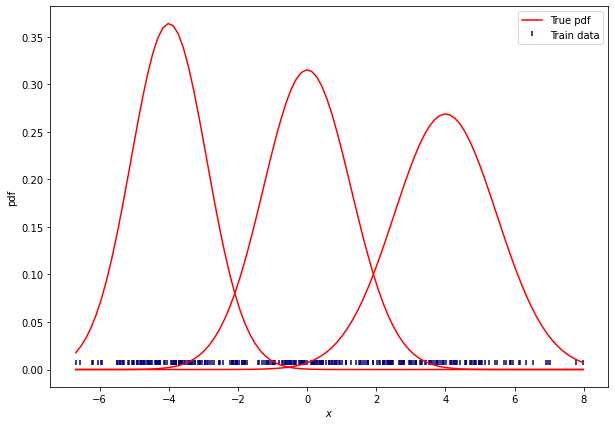

In [20]:
# visualize the training data
bins = np.linspace(np.min(X),np.max(X),100)

plt.figure(figsize=(10,7))
plt.xlabel("$x$")
plt.ylabel("pdf")
plt.scatter(X, [0.005] * len(X), color='navy', s=30, marker=2, label="Train data")

plt.plot(bins, pdf(bins, mu1, sigma1), color='red', label="True pdf")
plt.plot(bins, pdf(bins, mu2, sigma2), color='red')
plt.plot(bins, pdf(bins, mu3, sigma3), color='red')

plt.legend()
plt.plot()

In [21]:
# define the number of clusters to be learned
k = 3
weights = np.ones((k)) / k
means = np.random.choice(X, k)
variances = np.random.random_sample(size=k)
print(means, variances)

[ 4.72625041 -4.77408258  0.55097852] [0.78839617 0.67266879 0.72572916]


##### Actual implementation of EM

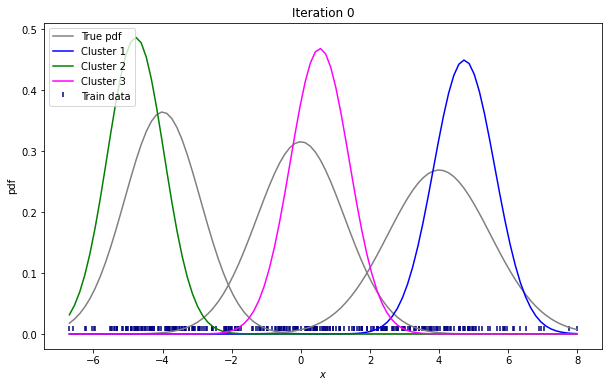

Iteration: 0
Mean: [ 4.40114303 -4.06737949  0.26417895]
Variance: [1.63380606 1.15617398 1.84705988]


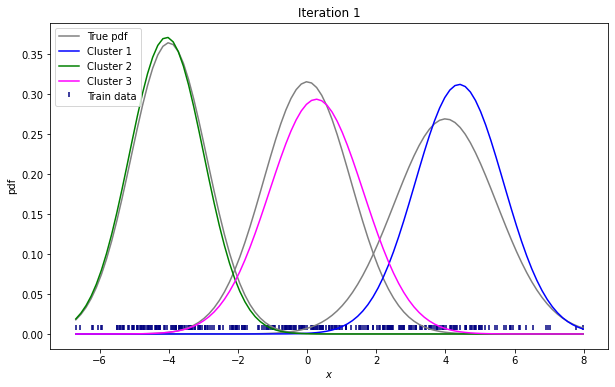

Iteration: 1
Mean: [ 4.29465284 -4.00875331  0.24177404]
Variance: [1.80449377 1.27672048 1.82208999]


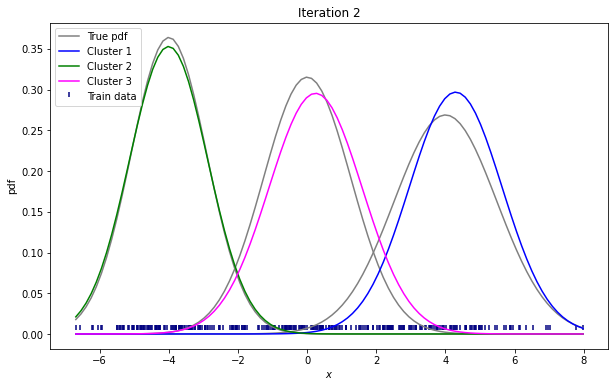

Iteration: 2
Mean: [ 4.23101839 -3.98140768  0.21393072]
Variance: [1.8771552  1.32170245 1.71029338]


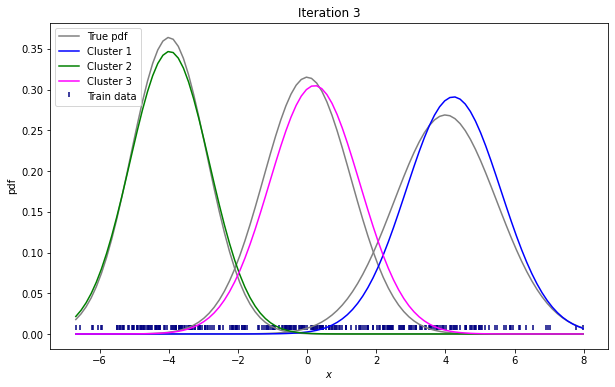

Iteration: 3
Mean: [ 4.18460068 -3.96693084  0.18519319]
Variance: [1.92496614 1.34406004 1.61868802]


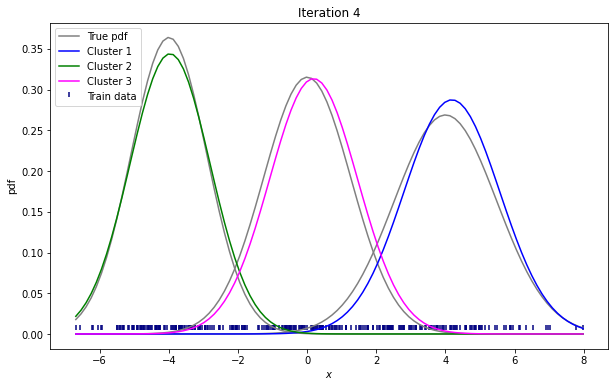

Iteration: 4
Mean: [ 4.14865604 -3.95963243  0.15789275]
Variance: [1.96161125 1.35522911 1.55137336]


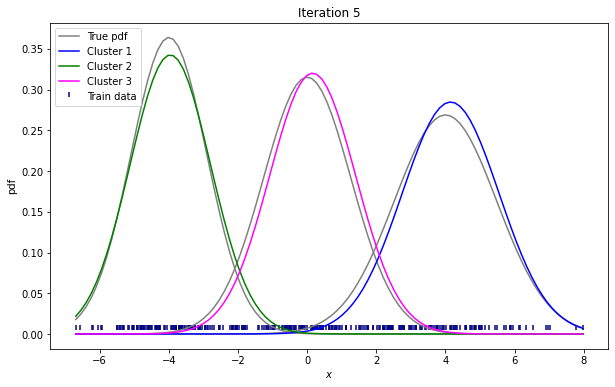

Iteration: 5
Mean: [ 4.12025862 -3.95661872  0.13303848]
Variance: [1.99089442 1.35988232 1.50230447]


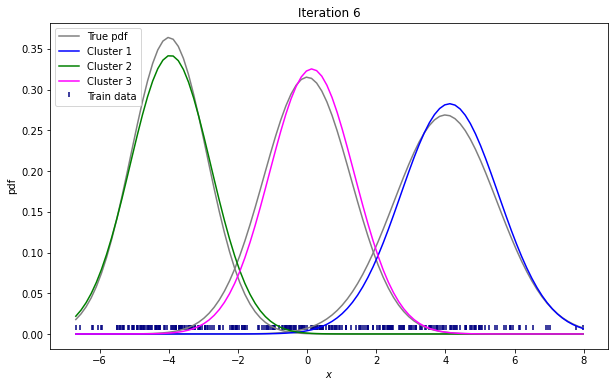

Iteration: 6
Mean: [ 4.09761564 -3.95613847  0.11100753]
Variance: [2.01459268 1.36069001 1.46626691]


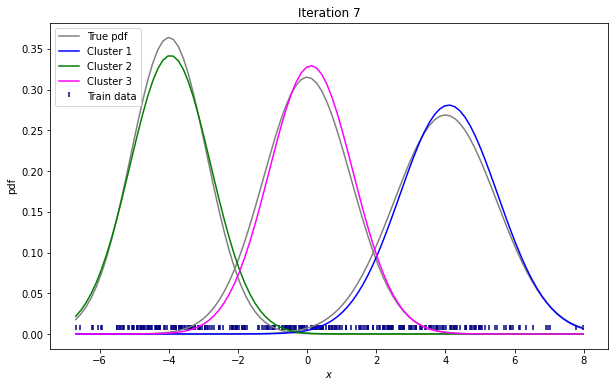

Iteration: 7
Mean: [ 4.0794622  -3.957093    0.09183589]
Variance: [2.03386512 1.35931844 1.43956495]


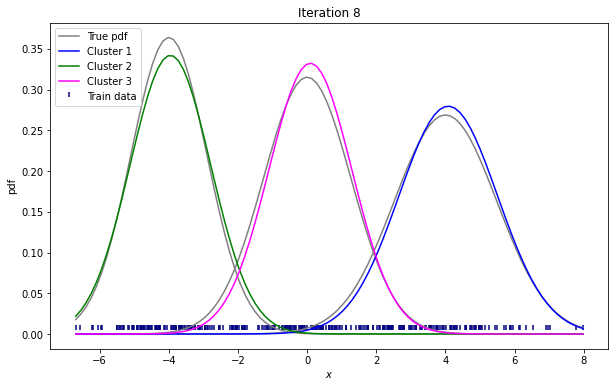

Iteration: 8
Mean: [ 4.06485517 -3.9587946   0.07537322]
Variance: [2.04957262 1.35681269 1.4196227 ]


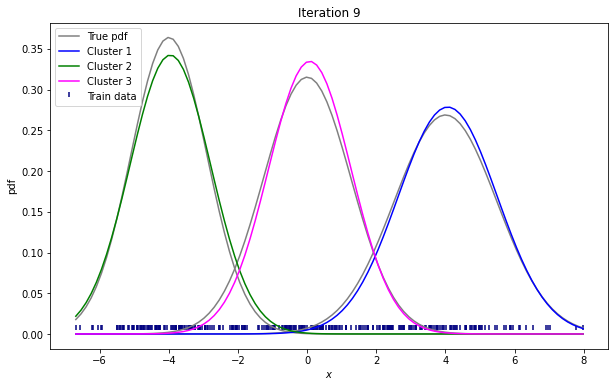

Iteration: 9
Mean: [ 4.05307143 -3.96081935  0.06137598]
Variance: [2.062387   1.35381688 1.40462457]


In [22]:
eps=1e-8
for step in range(10):
  
  if step % 1 == 0:
    plt.figure(figsize=(10,6))
    axes = plt.gca()
    plt.xlabel("$x$")
    plt.ylabel("pdf")
    plt.title("Iteration {}".format(step))
    plt.scatter(X, [0.005] * len(X), color='navy', s=30, marker=2, label="Train data")

    plt.plot(bins, pdf(bins, mu1, sigma1), color='grey', label="True pdf")
    plt.plot(bins, pdf(bins, mu2, sigma2), color='grey')
    plt.plot(bins, pdf(bins, mu3, sigma3), color='grey')

    plt.plot(bins, pdf(bins, means[0], variances[0]), color='blue', label="Cluster 1")
    plt.plot(bins, pdf(bins, means[1], variances[1]), color='green', label="Cluster 2")
    plt.plot(bins, pdf(bins, means[2], variances[2]), color='magenta', label="Cluster 3")
    
    plt.legend(loc='upper left')
    
    # plt.savefig("img_{0:02d}".format(step), bbox_inches='tight')
    plt.show()
  
  # calculate the maximum likelihood of each observation xi
  likelihood = []
  

  # Expectation step
  for j in range(k):
    likelihood.append(pdf(X, means[j], np.sqrt(variances[j])))
  likelihood = np.array(likelihood)
  # print('likelihood',likelihood.shape)
    
  b = []
  # Maximization step 
  # Enter your code here 2
  b_sum = []
  N = X.shape[0]
  sum_gamma = np.zeros((N, 1))
  
  for j in range(k):
    gamma = likelihood[j] * weights[j]
    for n in range(N):
      sum_gamma[n] += gamma[n]
    b.append(gamma)
    b_sum.append(sum_gamma)
  
  b = np.array(b)
  b_sum = np.array(b_sum).squeeze()

  for j in range(k):
    b[j] /= b_sum[j]
  
  for j in range(k):
    sum_var = 0
    weights[j] = np.sum(b[j], axis=0)/N
    means[j] = np.dot(b[j], X)/np.sum(b[j], axis=0)
    for n in range(N):
      x_ms = X[n]-means[j]
      sum_var += (b[j, n] * x_ms**2)
    variances[j] = sum_var/np.sum(b[j], axis=0)
  print("Iteration: " + str(int(step)))
  print("Mean: " + str(means))
  print("Variance: " + str(variances))

# 1b.) GMM with sklearn

In [25]:
gm = mixture.GaussianMixture(n_components=3, covariance_type = 'spherical', random_state=0).fit(X[:, np.newaxis])
means_sk = gm.means_.reshape(-1, 1)
variances_sk = gm.covariances_.reshape(-1, 1)
print("Mean with sklearn: \n" + str(means_sk))
print("Variance with sklearn: \n" + str(variances_sk))


Mean with sklearn: 
[[-0.21371276]
 [-4.06723924]
 [ 3.79374515]]
Variance with sklearn: 
[[1.68059844]
 [1.24115358]
 [2.63063313]]


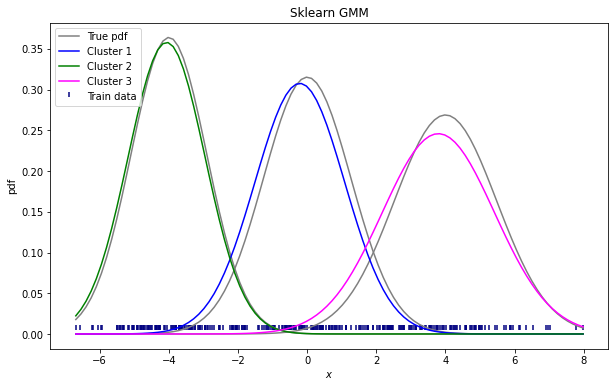

In [26]:
plt.figure(figsize=(10,6))
axes = plt.gca()
plt.xlabel("$x$")
plt.ylabel("pdf")
plt.title("Sklearn GMM")
plt.scatter(X, [0.005] * len(X), color='navy', s=30, marker=2, label="Train data")

plt.plot(bins, pdf(bins, mu1, sigma1), color='grey', label="True pdf")
plt.plot(bins, pdf(bins, mu2, sigma2), color='grey')
plt.plot(bins, pdf(bins, mu3, sigma3), color='grey')

plt.plot(bins, pdf(bins, means_sk[0], variances_sk[0]), color='blue', label="Cluster 1")
plt.plot(bins, pdf(bins, means_sk[1], variances_sk[1]), color='green', label="Cluster 2")
plt.plot(bins, pdf(bins, means_sk[2], variances_sk[2]), color='magenta', label="Cluster 3")

plt.legend(loc='upper left')
plt.show()

The means and variance in sklearn GMM mostly has the same ratio as the GMM built from scratch, albeit a small shift in magnitude in both means and variances. 